#Time_series_SARIMA

- Time series is one of impoartant algorithm to deal with series of time.
when I was first study Machine Learning, I have question what difference between Regression and Time reries. Both can predict numerical target-Y.

- Now I clear for me. one big point difference is for time series you can't control any factor becouse it nat have any feature need to trian Time series.
that is suitable for my real world data(task) to forecast the sales. 


##Data set

- The data came from my real data of sales (carton) in each month 
- Data start from Jan 2019 till Apr 2022 

In [30]:
#import lib and load data

In [31]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [32]:
path = "/content/drive/MyDrive/sale_forecasting_moss/ctn_data.csv"

In [33]:
data = pd.read_csv(path)
data['sales'] = pd.to_numeric(data['sales'],errors='coerce') #####
data['sales'] = data['sales'].fillna(0)
data['date'] = pd.to_datetime(data['date'], dayfirst = True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17901 entries, 0 to 17900
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    17901 non-null  datetime64[ns]
 1   sales   17901 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 279.8 KB


In [35]:
data.isnull().sum()

date     0
sales    0
dtype: int64

In [36]:
data

,date,sales
0,2019-01-03,0.1
1,2019-01-04,0.8
2,2019-01-04,0.0
3,2019-01-05,0.1
4,2019-01-07,0.0
...,...,...
17896,2022-04-30,0.1
17897,2022-04-30,0.9
17898,2022-04-30,0.1
17899,2022-04-30,0.3


- First take a look at data: sales (carton) per day/ order
so it have to groupby day to gather the sales to be day sales




In [37]:
data = data.groupby('date')['sales'].sum().reset_index().sort_values(by ='date', ascending = True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 0 to 1047
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1048 non-null   datetime64[ns]
 1   sales   1048 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.6 KB


In [39]:
data

,date,sales
0,2019-01-03,0.1
1,2019-01-04,0.8
2,2019-01-05,0.1
3,2019-01-07,0.0
4,2019-01-09,0.0
...,...,...
1043,2022-04-23,0.1
1044,2022-04-24,0.0
1045,2022-04-26,0.7
1046,2022-04-29,11.2


In [40]:
data = data.set_index('date')
data.index

DatetimeIndex(['2019-01-03', '2019-01-04', '2019-01-05', '2019-01-07',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14',
               ...
               '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21',
               '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-26',
               '2022-04-29', '2022-04-30'],
              dtype='datetime64[ns]', name='date', length=1048, freq=None)

In [41]:
data

,sales
date,
2019-01-03,0.1
2019-01-04,0.8
2019-01-05,0.1
2019-01-07,0.0
2019-01-09,0.0
...,...
2022-04-23,0.1
2022-04-24,0.0
2022-04-26,0.7


- after gather day sales, next step was month sales

In [42]:
y = data['sales'].resample('MS').sum()

In [43]:
y

date
2019-01-01      5.1
2019-02-01      1.8
2019-03-01      0.8
2019-04-01      0.0
2019-05-01      0.0
2019-06-01     90.5
2019-07-01    131.9
2019-08-01    162.0
2019-09-01    166.2
2019-10-01    181.6
2019-11-01    149.2
2019-12-01    281.3
2020-01-01    254.2
2020-02-01    229.0
2020-03-01    223.5
2020-04-01    152.9
2020-05-01    174.0
2020-06-01    181.1
2020-07-01    220.3
2020-08-01    272.2
2020-09-01    143.0
2020-10-01    370.8
2020-11-01    423.8
2020-12-01    255.1
2021-01-01    218.4
2021-02-01    262.1
2021-03-01    198.7
2021-04-01    212.6
2021-05-01    236.3
2021-06-01    209.8
2021-07-01    250.5
2021-08-01    263.1
2021-09-01    203.5
2021-10-01    222.8
2021-11-01    328.1
2021-12-01    293.4
2022-01-01    334.1
2022-02-01    344.1
2022-03-01    257.0
2022-04-01    134.0
Freq: MS, Name: sales, dtype: float64

- lineplot

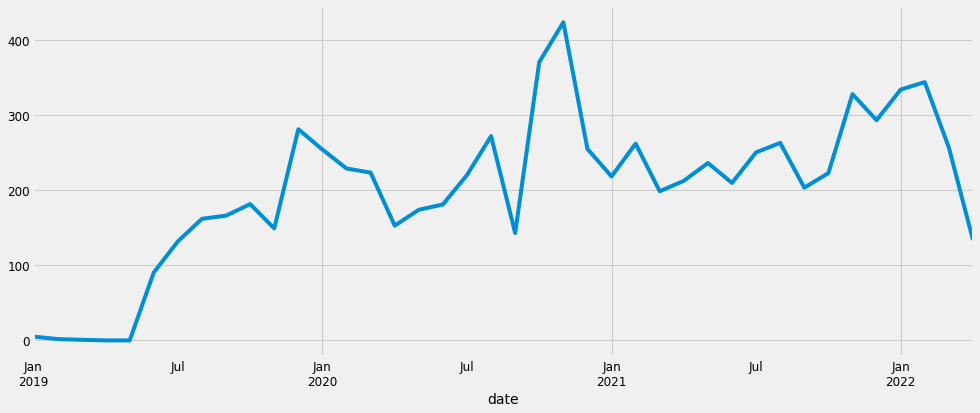

In [44]:
y.plot(figsize=(15, 6))
plt.show()

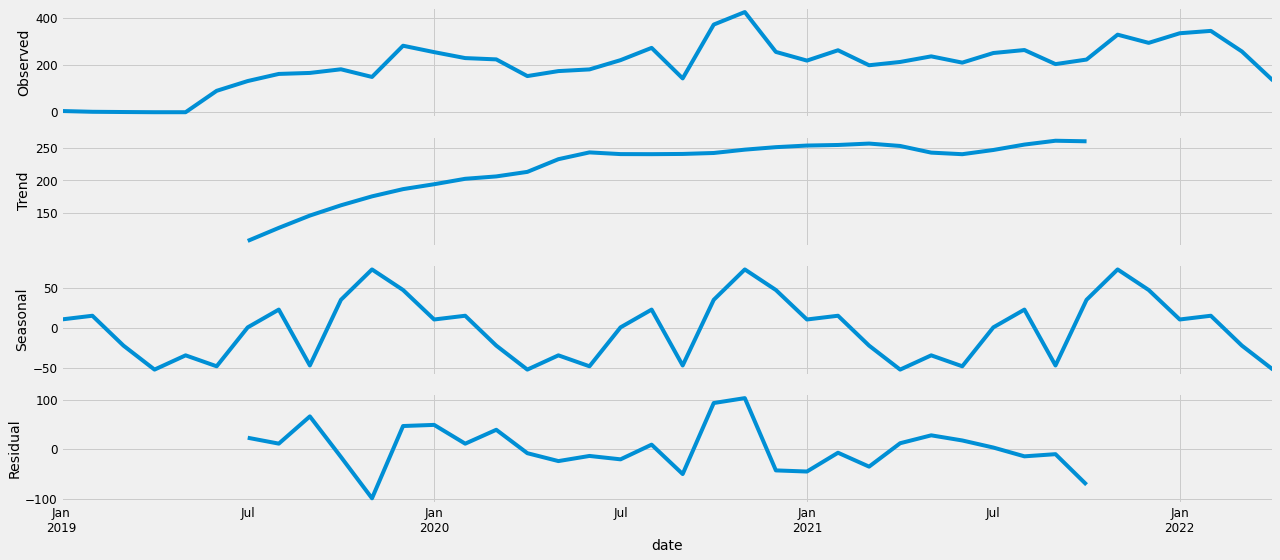

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

- observation  data show Trend and seasonal are perform so it's **non-stationarity**

#Time series forecasting with ARIMA
- SARIMA is a seasonal ARIMA mode
- (p,d,q)(P,D,Q)m

- (p,d,q) is a term of non-seasonal
- (P,D,Q) is a term of seasonal and m s the number of observations per year or the period
- ACF and PACF: an AR and MA model can be inferred from the PACF and ACF plots

ARIMA=> AR: inferred P | I: inferredd | MA: inferred q


##Modelling
Steps required to make the time series stationary and selecting the model according to the **lowest AIC** remain in the modelling process.

This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the **best performance for our model**.

In [46]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [47]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:536.1061336768229
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1243.403693755121
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:336.0702153495985
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:353.2820524272275
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:335.81699618529603
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:184.0134357127498
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:486.55050601620025
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2524.2706480889938
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:312.90304401899124
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:343.0173385228776
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:318.9612924531666
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:183.52004804471954
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:433.84467442148576
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1254.7178574768986
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:317.8141514927793
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:315.28241402206174
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1172.5966231110588
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:168.81418917714907


lowest AIC is 158.02 with **ARIMA(1, 1, 0)x(1, 1, 0, 12)** Therefore we should consider this to be optimal option

In [48]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3806      0.342     -1.112      0.266      -1.052       0.290
ar.S.L12      -0.6074      0.161     -3.766      0.000      -0.923      -0.291
sigma2      3043.7256   1619.510      1.879      0.060    -130.456    6217.908


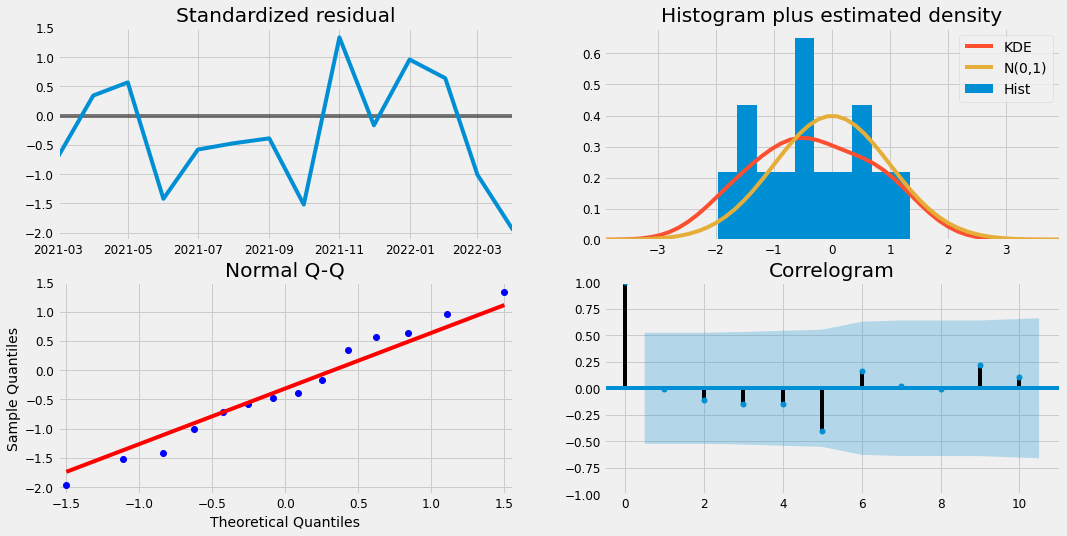

In [49]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

##Prediction
step to predict the sales from '2022-01-01' 4 month ahead compare with observation data

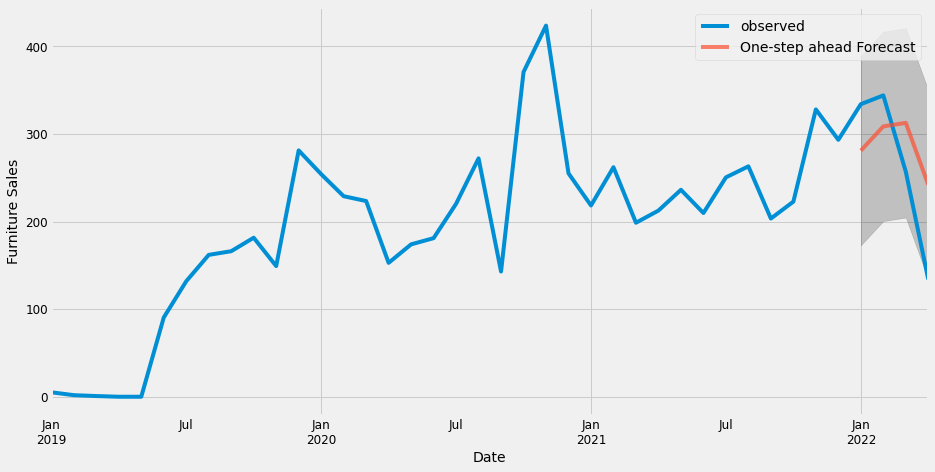

In [50]:
pred = results.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

## Measure
- Mean Squared Error
- Root Mean Squared Error

In [51]:
y_forecasted = pred.predicted_mean
y_truth = y['2022-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4708.87


In [52]:
y_forecasted

date
2022-01-01    281.065301
2022-02-01    308.711061
2022-03-01    312.765077
2022-04-01    241.984594
Freq: MS, dtype: float64

In [53]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 68.62


## Forecast
step to use SARIMA model to forecast sales(carton) 12 month ahead.

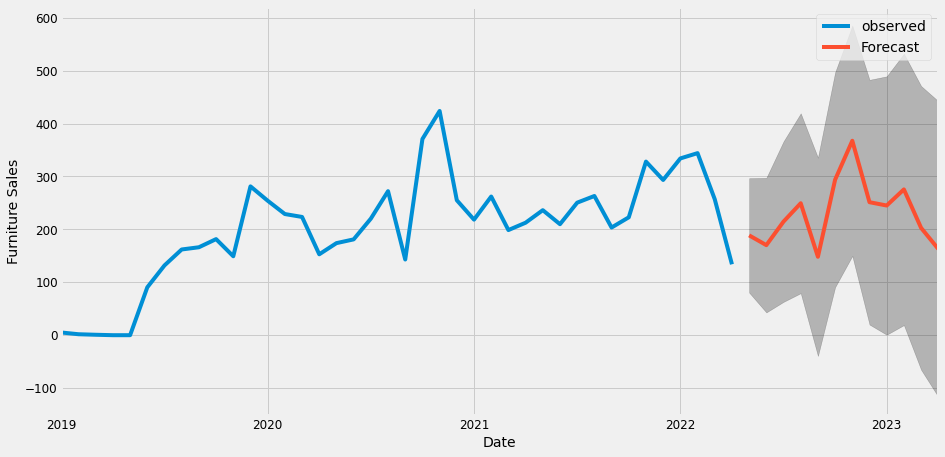

In [54]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [55]:
pred_uc2 = pred_uc.predicted_mean

In [56]:
pred_uc2

2022-05-01    188.694891
2022-06-01    170.203372
2022-07-01    214.711761
2022-08-01    249.384638
2022-09-01    148.196130
2022-10-01    293.870480
2022-11-01    367.504604
2022-12-01    251.380620
2023-01-01    245.085289
2023-02-01    275.547866
2023-03-01    202.844384
2023-04-01    162.991213
Freq: MS, dtype: float64

In [57]:
import plotly.express as px

In [58]:
df=pd.DataFrame(pred_uc2, columns=['pred']) 
df['date'] = pd.date_range(start='2022-04-01', periods=12, freq='M')
fig = px.line(df, x="date", y="pred")
# Edit the layout
fig.update_layout(title='Apollo IMS Forecast',
                   xaxis_title='Date',
                   yaxis_title='CTN',
                   template='gridon')
fig.show()

#Conclusion
- This code is my real task. I use the forecast sales to my real world.

- sales forecasting that only use the sales data in each month, Time series is suitable way to get the forcasting.
- SARIMA may not model to easy to understand with strong mathematics behind but to use it for non-expert with follow the step is not bad. 
- the most important step is parameter Selection (p,d,q)(P,D,Q)m by using lowest AIC
- finally, Time series is not only ARIMA. many technique and algorithm able to handle time reries task such as LSTM, CNN, XGboost ,etc. that I need to learn more and more    